# Pymaceuticals Inc.
---

### Analysis

1. There is a positive correlation between the mouses weight and the size of the tumor. the larger the mouse, the larger the sie of the tumor with a correlation value of 0.84.
2. Of the 4 drug regimens the Capomulin and Ramicane were the most affective at reducing tumor size where as the Infubinol and Ceftamin were the least affective of the 4 at reducing tumor size.
3. When Capomulin was tested on Mouse l509 the tumor size saw a large drop in size around day 20 and then another significant drop in size 10 days later around day 30.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\ccana\Downloads\Starter_Code (12)\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\ccana\Downloads\Starter_Code (12)\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_frame = pd.merge(mouse_metadata, study_results, how= "outer", on= 'Mouse ID')

# Display the data table for preview
merged_data_frame= merged_data_frame[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

merged_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
mice_number = len(merged_data_frame['Mouse ID'].unique())
print(mice_number)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_frame.loc[merged_data_frame.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = merged_data_frame.loc[merged_data_frame["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_data_frame[merged_data_frame['Mouse ID'].isin(duplicate_mice)== False]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataframe['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_dataframe.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_standard_deviation = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_dataframe = pd.DataFrame({'Mean Tumor Volume': regimen_mean,
                                        'Median Tumor Volume': regimen_median,
                                        'Tumor Volume Variance': regimen_variance,
                                        'Tumor Volume Std. Dev': regimen_standard_deviation,
                                        'Tumor Volume Std. Err.': regimen_sem})
summary_stats_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

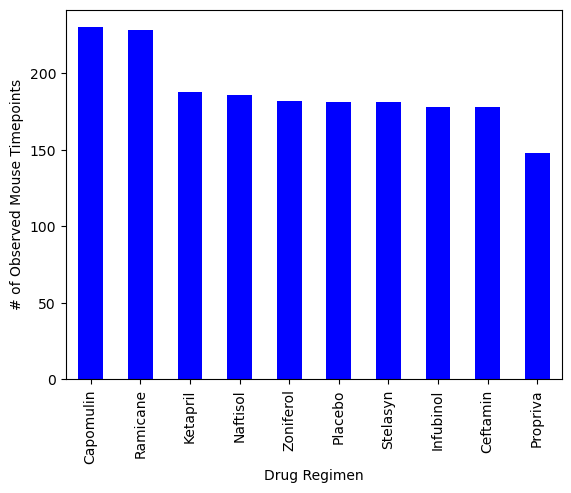

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_dataframe['Drug Regimen'].value_counts()
first_bar_chart = mice_count.plot.bar(color= 'blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

C:\Users\ccana\AppData\Local\Temp\ipykernel_5524\3107866751.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis, ha='right',rotation=90)


<BarContainer object of 10 artists>

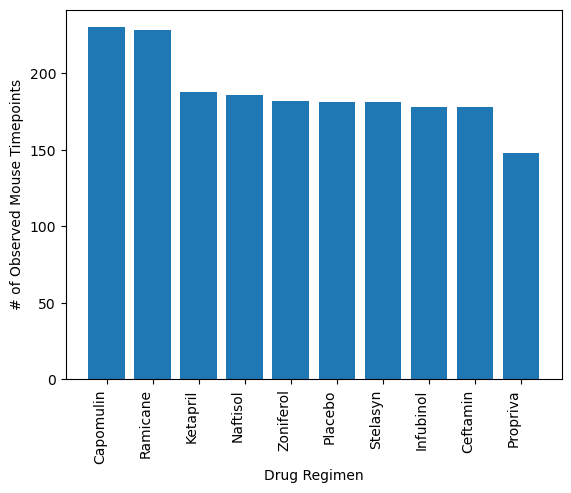

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

fig, ax = plt.subplots()
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_xticklabels(x_axis, ha='right',rotation=90)
ax.bar(x_axis, y_axis)

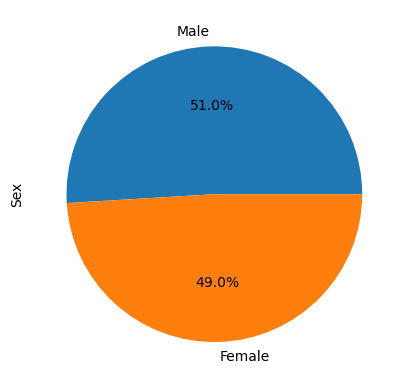

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_dataframe['Sex'].value_counts()
sex_data.plot.pie(autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

([<matplotlib.patches.Wedge at 0x1d3f3950a50>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

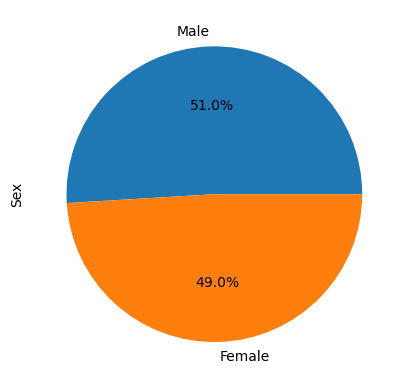

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
fig, ax = plt.subplots()
ax.set_ylabel('Sex')
ax.pie(clean_dataframe['Sex'].value_counts(),labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_dataframe.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_dataframe,on=['Mouse ID','Timepoint'], how='left')

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    print(final_tumor_vol.quantile(.25))
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

32.37735684
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
31.56046955
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
54.04860769
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
48.72207785
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


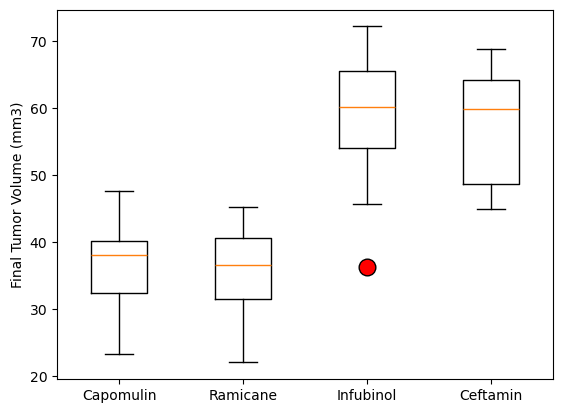

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_volume_list, labels = treatment_list, flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

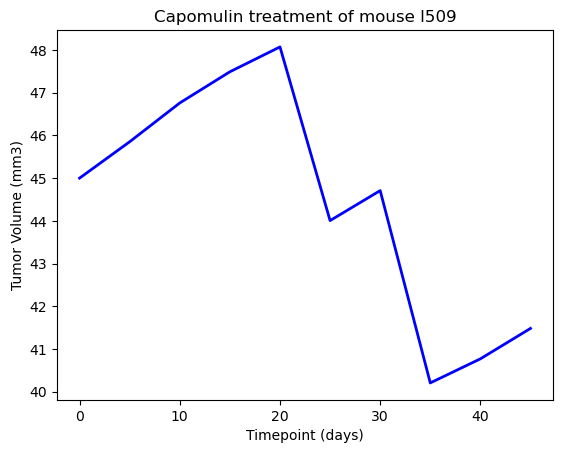

In [13]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_dataframe.loc[clean_dataframe['Drug Regimen'] == 'Capomulin',:]

line_df = capomulin_mouse.loc[capomulin_mouse['Mouse ID'] == 'l509',:]
line_df.head()
x_axis = line_df['Timepoint']
tumorsize = line_df['Tumor Volume (mm3)']

fig, ax= plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumorsize, linewidth=2, color='blue', label='Fahreneit')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

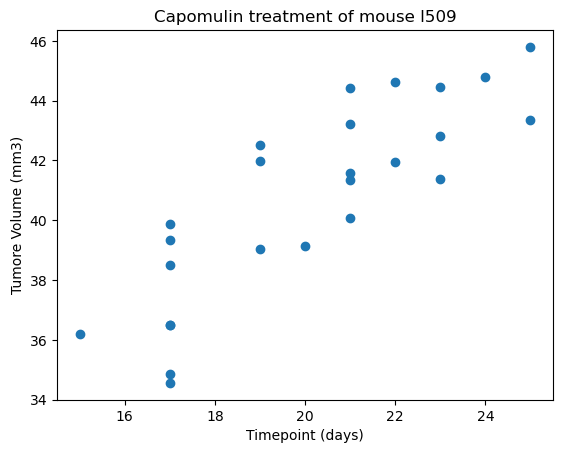

In [14]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = capomulin_mouse.groupby('Mouse ID')['Weight (g)'].mean()
mouse_ave_tumor = capomulin_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

fig, ax = plt.subplots()
ax.set_title('Capomulin treatment of mouse l509')
ax.set_ylabel('Tumore Volume (mm3)')
ax.set_xlabel('Timepoint (days)')
ax.scatter(mouse_weight, mouse_ave_tumor)

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


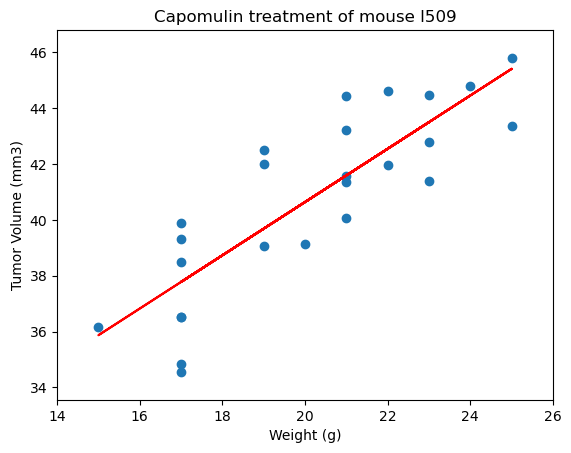

In [15]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mouse_ave_tumor.values,mouse_weight.values)[0],2)}") 

ca_slope, ca_int, ca_r, ca_p, ca_std_err = st.linregress(mouse_weight.values, mouse_ave_tumor.values)

ca_fit = ca_slope * mouse_weight.values + ca_int 

plt.scatter(mouse_weight.values,mouse_ave_tumor.values)
plt.plot(mouse_weight.values,ca_fit, '-', color= 'red')
plt.title('Capomulin treatment of mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylim(mouse_ave_tumor.values.min()-1,mouse_ave_tumor.values.max()+1)
plt.xlim(mouse_weight.values.min()-1,mouse_weight.values.max()+1)

plt.show()
